# Token Probability Analysis

This notebook provides tools for analyzing token probabilities in LLMs using TransformerLens.


### *Load the Model*

In [1]:
import ipywidgets as widgets
import transformer_lens
import token_probs
import model_loader
import torch
from model_loader import load_model, print_available_models, gpu_mem_check,list_available_models
from token_probs import get_top_n_tokens, generate_text, top_n_viz, generate_text_with_probs, map_prob_to_color, create_html_visualization, display_colored_text, get_token_probabilities_per_layer,layer_probs_viz,top_probs_by_layer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# SELECT MODEL #
model_dropdown = widgets.Dropdown(
    options=list_available_models(),
    value=list_available_models()[0],  # Set default to first model
    description='Select Model:',
    disabled=False,
)
display(model_dropdown)

Dropdown(description='Select Model:', options=('gpt2-small', 'gpt2-medium', 'Qwen 2-0.5B', 'Qwen 2-0.5B-Instru…

In [2]:
# Reload libraries after updating functions
import importlib
importlib.reload(model_loader)
importlib.reload(token_probs)
from model_loader import load_model, print_available_models, gpu_mem_check,list_available_models
from token_probs import get_top_n_tokens, generate_text, top_n_viz, generate_text_with_probs, map_prob_to_color, create_html_visualization, display_colored_text, get_token_probabilities_per_layer,layer_probs_viz,top_probs_by_layer

In [3]:
# Load Model #
model_name = model_dropdown.value
model = load_model(model_name)
gpu_mem_check()

Loading model gpt2-medium from gpt2-medium...


c:\Users\akozlo\AppData\Local\miniconda3\envs\akpy24\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loaded pretrained model gpt2-medium into HookedTransformer
Model loaded successfully on cuda.
Total GPU Memory: 11.99 GB
Allocated GPU Memory: 1.54 GB
Cached GPU Memory: 1.55 GB


### *Model Architecture Details*

In [5]:
# Print model architecture details
print("Model Architecture Details:")
print(f"Model name: {model.cfg.model_name}")
print(f"Layers: {model.cfg.n_layers}")
print(f"Heads: {model.cfg.n_heads}")
print(f"d_model: {model.cfg.d_model}")
print(f"d_head: {model.cfg.d_head}")
print(f"d_mlp: {model.cfg.d_mlp}")
print(f"Vocabulary size: {model.cfg.d_vocab}")
print(f"Context window: {model.cfg.n_ctx}")
print(f"Total parameters: {model.cfg.n_params/1e9:.2f}B")
print(f"Activation function: {model.cfg.act_fn}")
print(f"Precision: {(next(model.parameters()).dtype)}")

# More detail is available by simply running print(model)


Model Architecture Details:
Model name: gpt2-medium
Layers: 24
Heads: 16
d_model: 1024
d_head: 64
d_mlp: 4096
Vocabulary size: 50257
Context window: 1024
Total parameters: 0.30B
Activation function: gelu_new
Precision: torch.float32


### *Most Probable Next-Tokens*

The capital of France is ____________


,Token,Probability
0,the,0.060
1,a,0.048
2,now,0.027
3,Paris,0.024
4,in,0.023
5,not,0.020
6,one,0.017
7,France,0.016
8,known,0.016
9,home,0.015

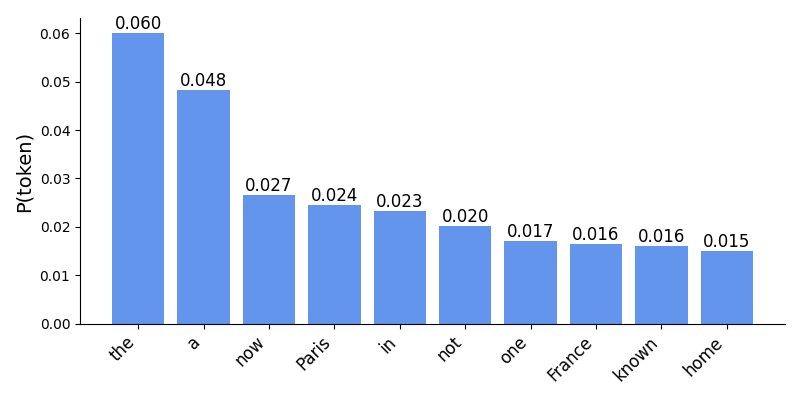

In [6]:
prompt = "The capital of France is"
top_probs_out = get_top_n_tokens(model, prompt, n=10, temperature=1)
top_n_viz(top_probs_out)

### *Visualize Completion Probabilities*

In [7]:
generated_text, clean_tokens, token_probs = generate_text_with_probs(model,prompt, max_new_tokens=10, temperature=1, random_seed=2)
display_colored_text(generated_text, clean_tokens, token_probs)

### *Target Token Probability by Layer*

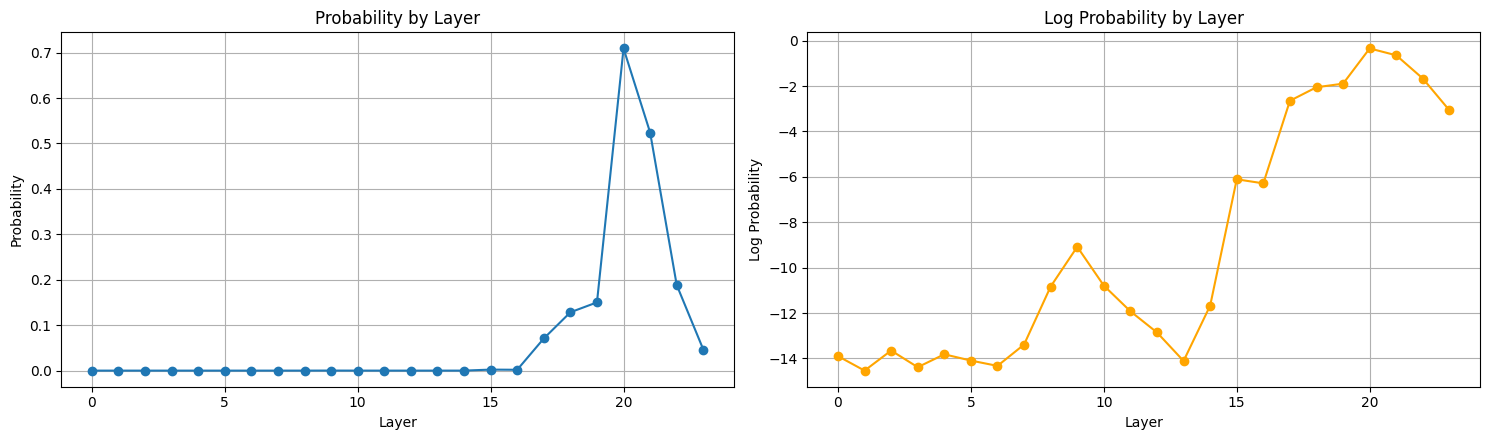

In [8]:
prompt = "The capital of France is"
layer_probs = get_token_probabilities_per_layer(model, prompt, target_word = " Paris", temperature=0.7)
layer_probs_viz(layer_probs)

### *Most Probable Token by Layer*

In [9]:
top_probs_by_layer_out = top_probs_by_layer(model,prompt,temperature=.7)

,Layer,Top Token,Top Probability
0,1,not,0.342
1,2,not,0.477
2,3,not,0.522
3,4,not,0.572
4,5,not,0.528
5,6,not,0.700
6,7,not,0.496
7,8,not,0.264
8,9,often,0.289
9,10,now,0.299
